In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Importing Dataset

In [3]:
df = pd.read_csv("housing.csv")

### EDA

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


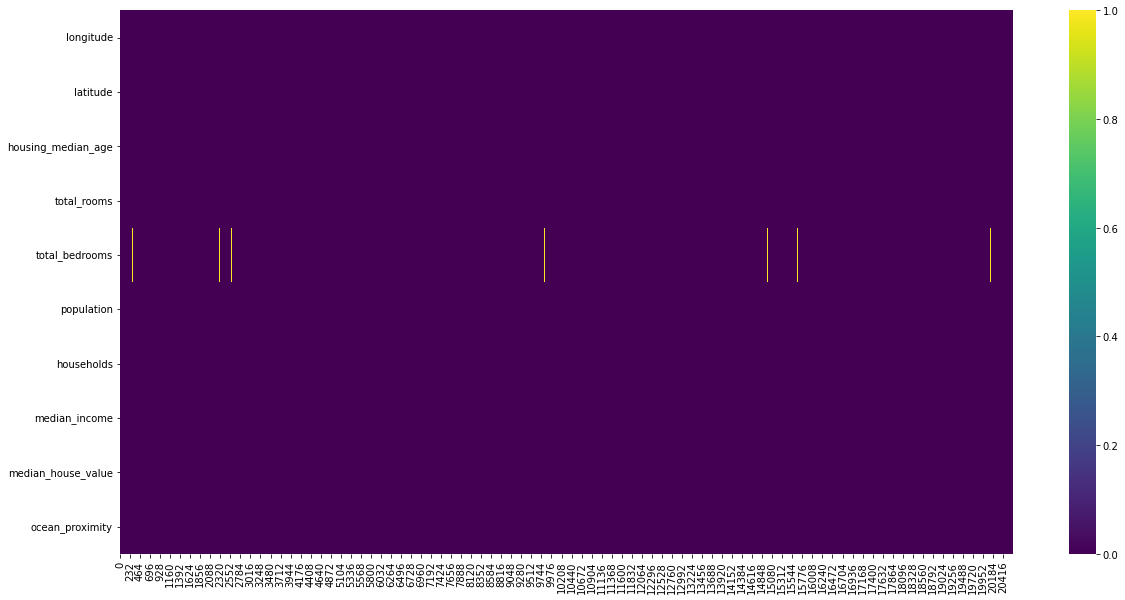

In [8]:
# check nan values
transposed_df = df.transpose().isna()
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(transposed_df, ax = ax, cmap = "viridis")
plt.show()

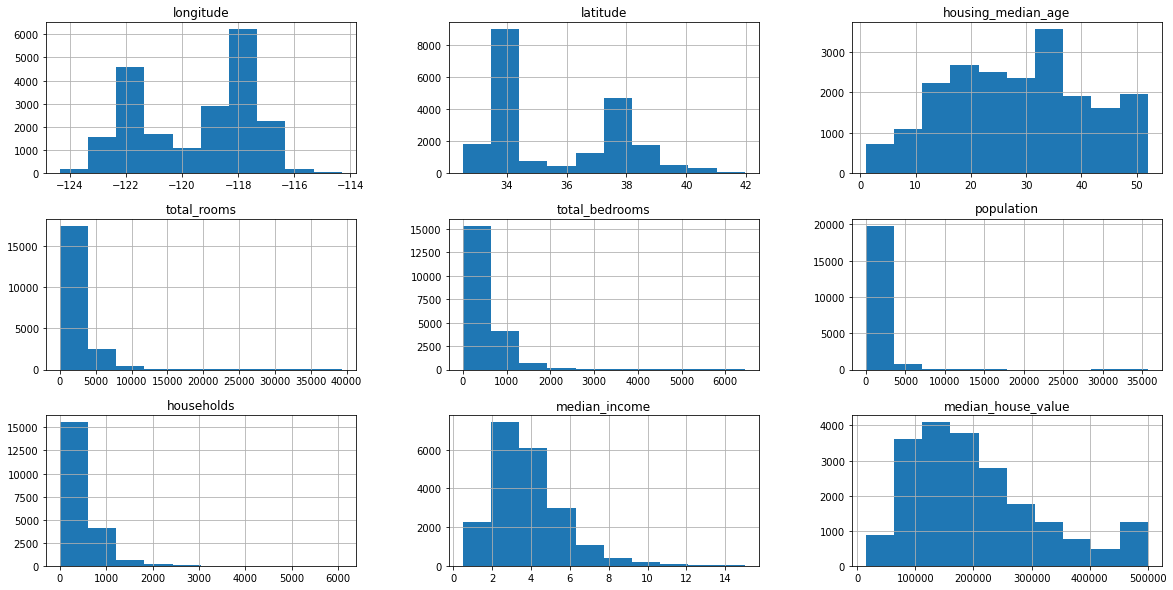

In [9]:
# check distribution
df.hist(figsize = (20,10))
plt.show()

In [10]:
# check relation between ocean_proximity and median_house_value
geo = px.scatter_geo(data_frame = df, lat = "latitude", lon = "longitude", 
                    color = "ocean_proximity", size = "median_house_value",
                    projection = "natural earth")
geo.show() 	

### Cleaning

In [11]:
# category to boolian
df = pd.get_dummies(df, columns = ["ocean_proximity"], drop_first = True)

In [12]:
# drop nan values
df = df.dropna(axis = 0)

### Clustering

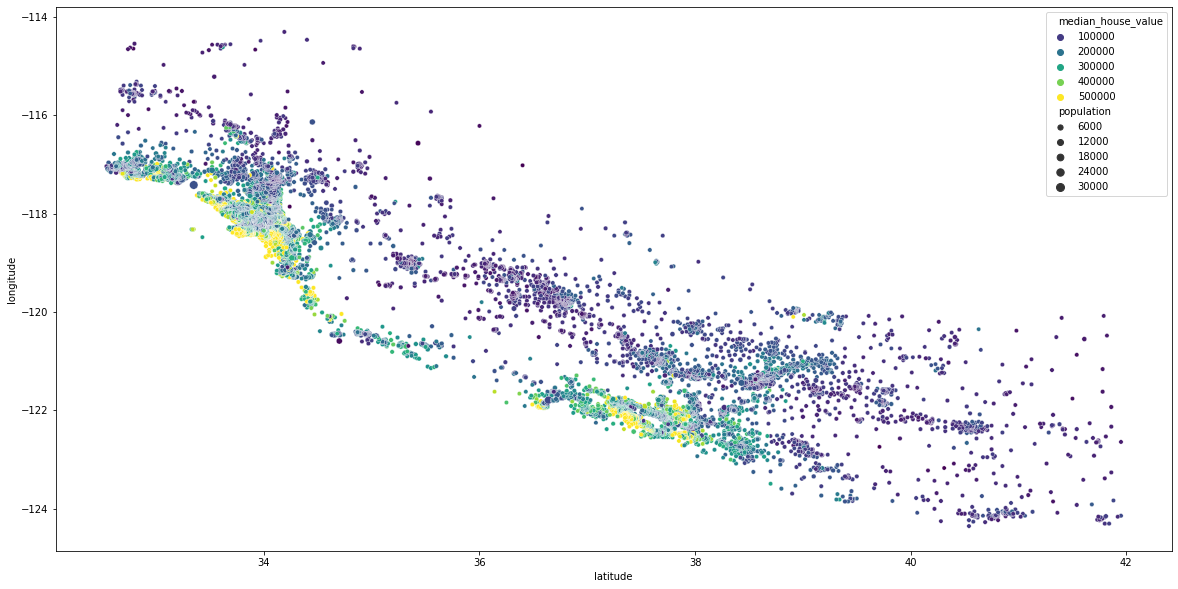

In [28]:
fig, ax = plt.subplots(figsize = (20,10))
sns.scatterplot(df, x = "latitude", y = "longitude", size = "population" , hue = "median_house_value",palette = "viridis", ax = ax)
plt.show()

/tmp/ipykernel_14620/2682969678.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



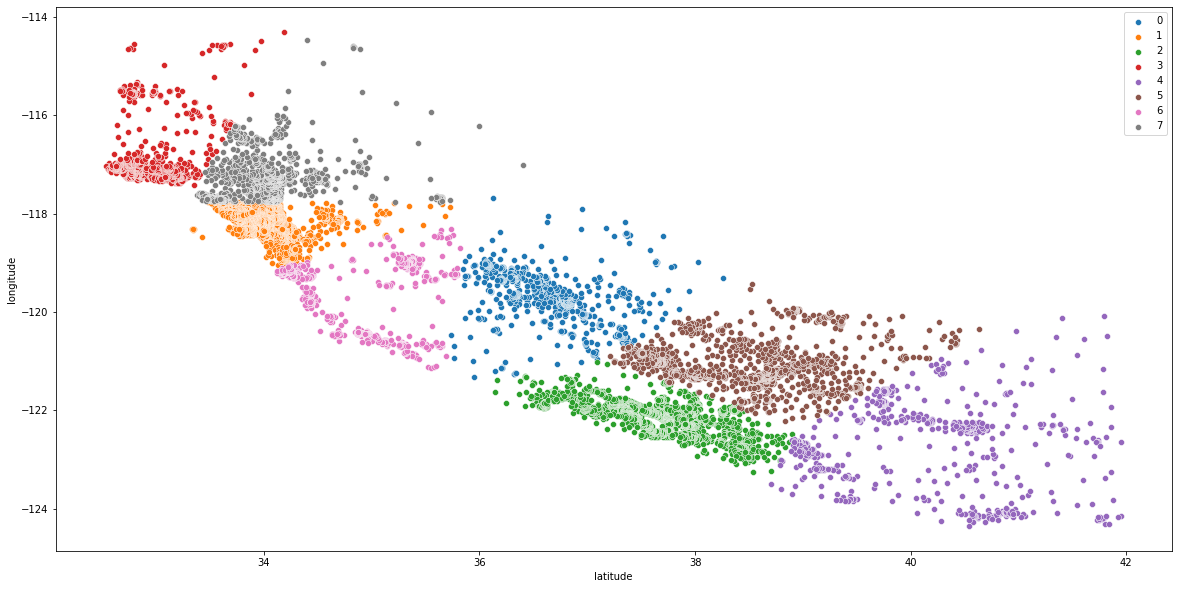

In [31]:
fig, ax = plt.subplots(figsize = (20,10))
df_asli = df[["latitude", "longitude"]]
kmeans = KMeans(n_clusters = 8)
kmeans.fit(df_asli)
kmeans_labels = kmeans.labels_
df_asli["labels"] = kmeans.labels_
unique_labels = np.unique(kmeans_labels)
for i in range(len(unique_labels)):
    sns.scatterplot(df_asli[df_asli["labels"] == i], x = "latitude", y = "longitude", label = i)
plt.show()

### Cut target column

In [32]:
y = df[["median_house_value"]]
X = df.drop(["median_house_value"], axis = 1)
# ["median_income","ocean_proximity_NEAR BAY", "ocean_proximity_NEAR OCEAN", "total_rooms", "housing_median_age"]

### Split train test

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 13)

### Normalization

In [34]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)


### Train & Test Models

In [35]:
# Neural Network
def build_nn():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, input_shape = (X_train.shape[1],), activation = "relu"))
    model.add(tf.keras.layers.Dense(50, activation = "relu"))
    model.add(tf.keras.layers.Dense(1, activation = "linear"))
    model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
    return model 

In [36]:
# A list for comparison r2 score of each model
models_result = []

# Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
prediction_rfr = rfr.predict(X_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction_lr = lr.predict(X_test)

# Neural Network
nn = build_nn()
nn.fit(X_train, y_train, epochs = 1000, batch_size = 32, verbose = False)
prediction_nn = nn.predict(X_test)

models_result.append(["RandomForest",r2_score(y_test, prediction_rfr)])
models_result.append(["LinearRegression",r2_score(y_test, prediction_lr)])
models_result.append(["NN",r2_score(y_test, prediction_nn)])

/tmp/ipykernel_12398/2949202154.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

2022-12-11 20:33:41.993405: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-11 20:33:42.002540: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-11 20:33:42.002633: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cando): /proc/driver/nvidia/version does not exist
2022-12-11 20:33:42.025096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critic

160/160 [==============================] - 0s 1ms/step


In [37]:
# create dataframe from the list
models = pd.DataFrame(models_result, columns = ["model", "r2_score"])

In [38]:
# check which model did the best
models = models.sort_values(["r2_score"], ascending = False)
models

,model,r2_score
0,RandomForest,0.821874
2,NN,0.775268
1,LinearRegression,0.646857


In [45]:
# see real values 
prediction_rfr_invers = scaler_y.inverse_transform(np.reshape(prediction_rfr,(-1,1)))
y_test_invers = scaler_y.inverse_transform(np.reshape(y_test,(-1,1)))

print(f"Random Forest Prediction:\n {np.squeeze(prediction_rfr_invers[-5:])}\n--------")
print(f"Real Values:\n {np.squeeze(y_test_invers[-5:])}")

Random Forest Prediction:
 [500001.   154025.   302588.01 192516.   106729.  ]
--------
Real Values:
 [500001. 124100. 352400. 281600. 139200.]


In [ ]:
# Author : amyrmahdy
# Date: 4 Oct 2022